In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Clicked Ads Dataset.csv"
df = pd.read_csv(path)

In [ ]:
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
172,172,80.23,31,476663950.0,196.23,Perempuan,3/19/2016 14:23,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Furniture
579,579,68.11,38,517191360.0,231.21,Perempuan,1/7/2016 21:21,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Bank
284,284,47.51,51,375903990.0,130.41,Laki-Laki,5/21/2016 1:36,Yes,Bandung,Jawa Barat,Travel
113,113,46.13,46,264871040.0,123.64,Laki-Laki,1/9/2016 5:44,Yes,Bogor,Jawa Barat,Travel
861,861,68.25,29,492273600.0,220.08,Perempuan,2/15/2016 16:18,No,Batam,Kepulauan Riau,Bank


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


#Tugas 1


##statistical analysis

In [ ]:
df = df.drop(columns='Unnamed: 0')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp
count,987.000000,1000.000000,9.870000e+02,989.000000,1000
mean,64.929524,36.009000,3.848647e+08,179.863620,2016-04-10 10:33:36.840000
min,32.600000,19.000000,9.797550e+07,104.780000,2016-01-01 02:52:00
25%,51.270000,29.000000,3.286330e+08,138.710000,2016-02-18 02:55:15
50%,68.110000,35.000000,3.990683e+08,182.650000,2016-04-07 17:27:00
75%,78.460000,42.000000,4.583554e+08,218.790000,2016-05-31 03:18:00
max,91.430000,61.000000,5.563936e+08,267.010000,2016-07-24 00:22:00
std,15.844699,8.785562,9.407999e+07,43.870142,NaN


In [ ]:
df.select_dtypes(include='object').describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


##general univariate analysis

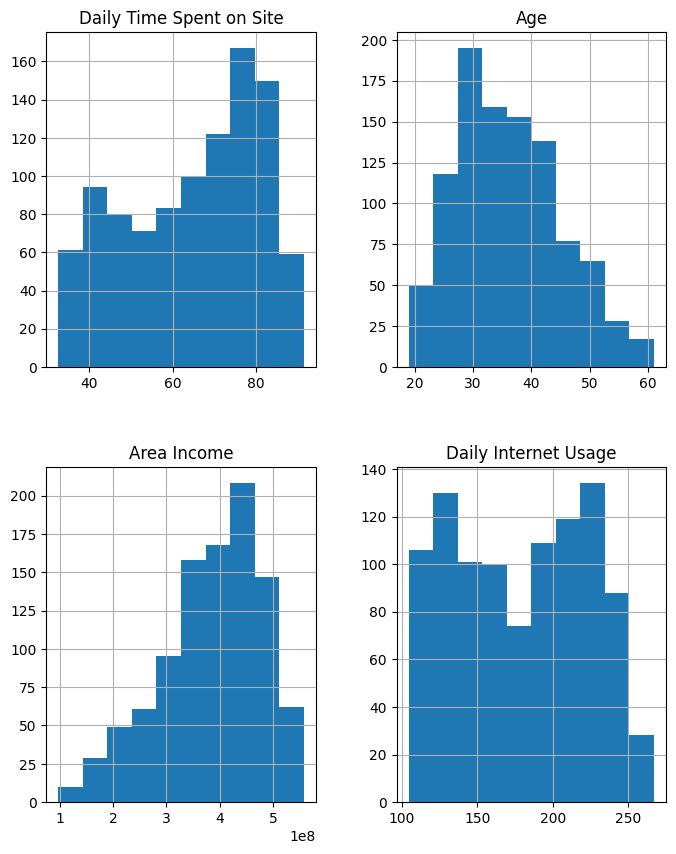

In [ ]:
import matplotlib.pyplot as plt
df.select_dtypes(exclude='datetime').hist(layout=(2,2), figsize=(8,10))
plt.show()

In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts(), end='\n\n')

Male
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64

Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: count, dtype: int64

province
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90

<Axes: xlabel='Male'>

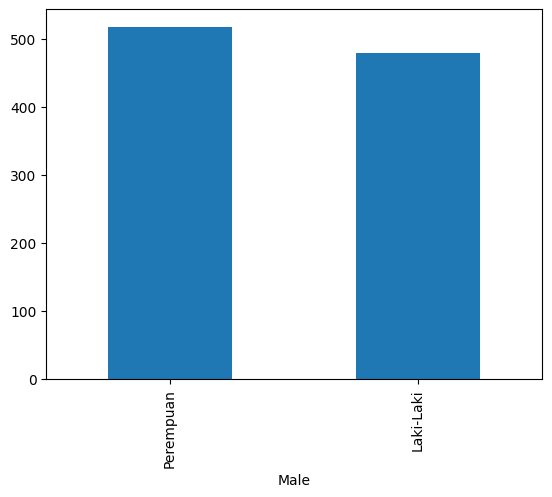

In [ ]:
df['Male'].value_counts().plot(kind='bar')

<Axes: xlabel='Clicked on Ad'>

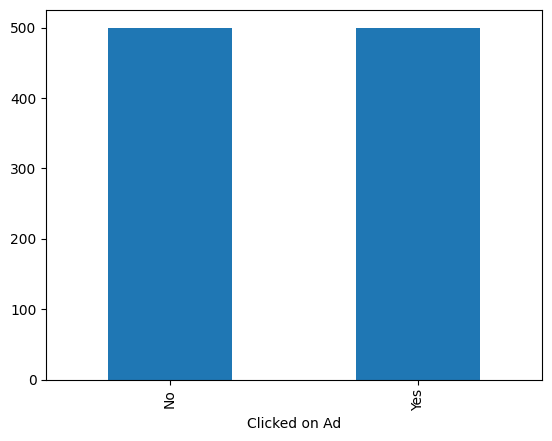

In [ ]:
df['Clicked on Ad'].value_counts().plot(kind='bar')

<Axes: xlabel='city'>

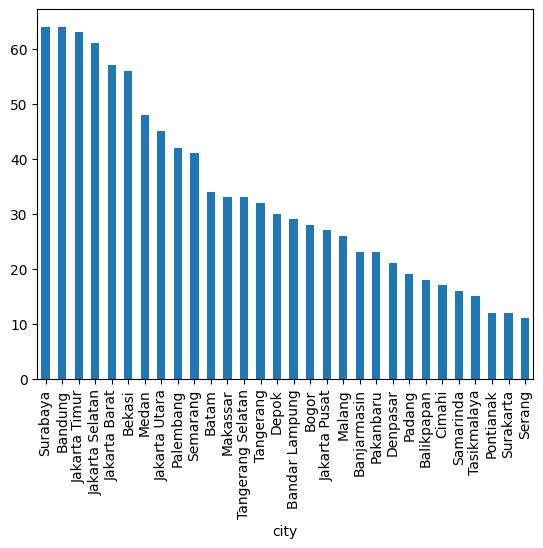

In [ ]:
df['city'].value_counts().plot(kind='bar')

<Axes: xlabel='province'>

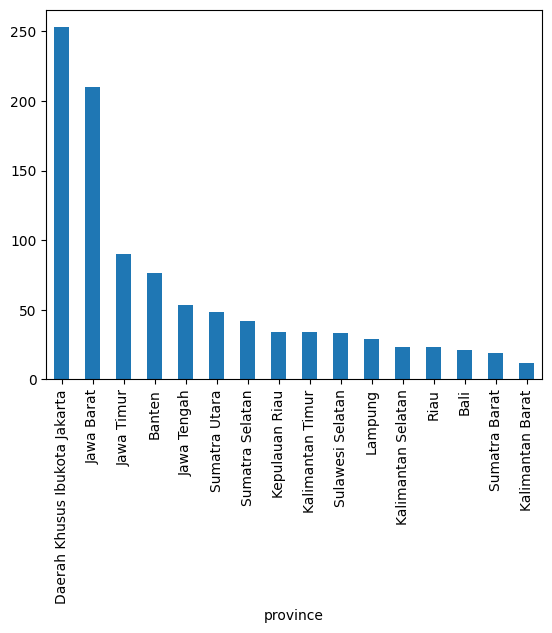

In [ ]:
df['province'].value_counts().plot(kind='bar')

<Axes: xlabel='category'>

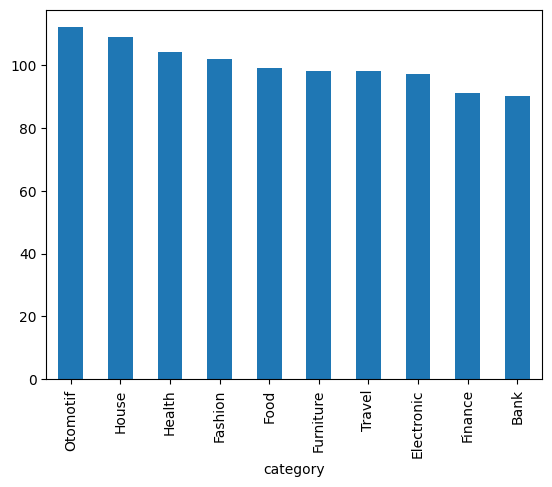

In [ ]:
df['category'].value_counts().plot(kind='bar')

##specific univariate analysis

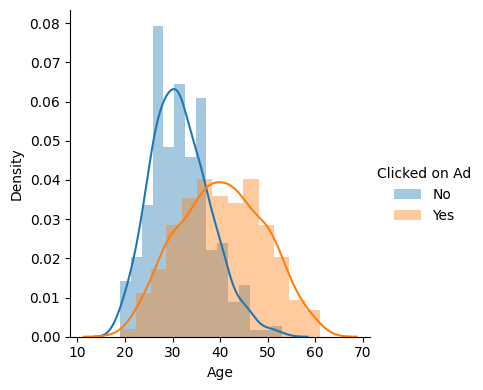

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(df, hue='Clicked on Ad', height=4, aspect=1).map(sns.distplot, 'Age').add_legend()

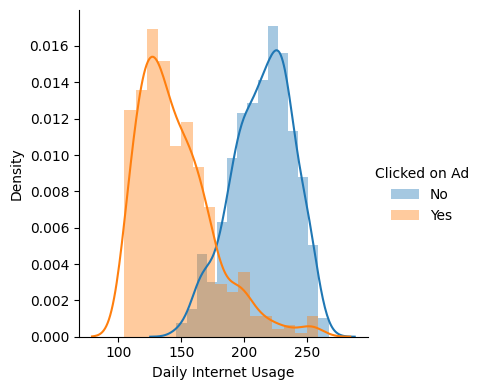

In [ ]:
sns.FacetGrid(df, hue='Clicked on Ad', height=4, aspect=1).map(sns.distplot, 'Daily Internet Usage').add_legend()

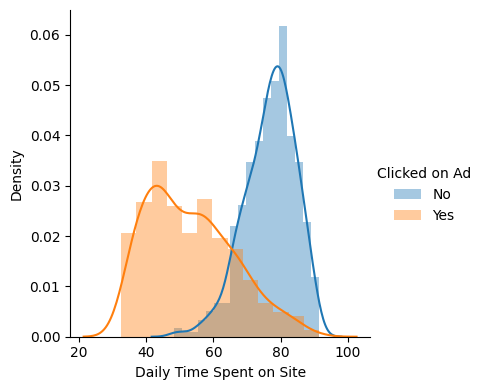

In [ ]:
sns.FacetGrid(df, hue='Clicked on Ad', height=4, aspect=1).map(sns.distplot, 'Daily Time Spent on Site').add_legend()

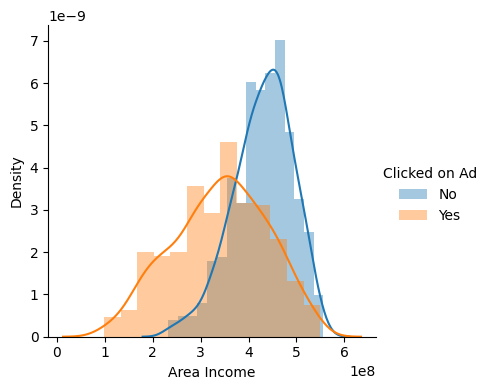

In [ ]:
sns.FacetGrid(df, hue='Clicked on Ad', height=4, aspect=1).map(sns.distplot, 'Area Income').add_legend()

##bivariate analysis

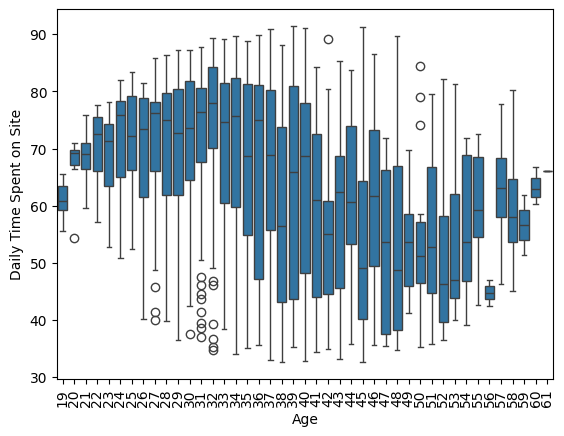

In [ ]:
sns.boxplot(x='Age', y='Daily Time Spent on Site', data=df)
plt.xticks(rotation=90)
plt.show()

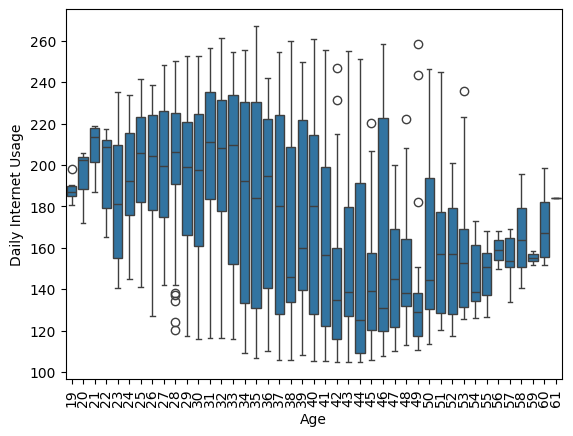

In [ ]:
sns.boxplot(x='Age', y='Daily Internet Usage', data=df)
plt.xticks(rotation=90)
plt.show()

##multivariate analysis

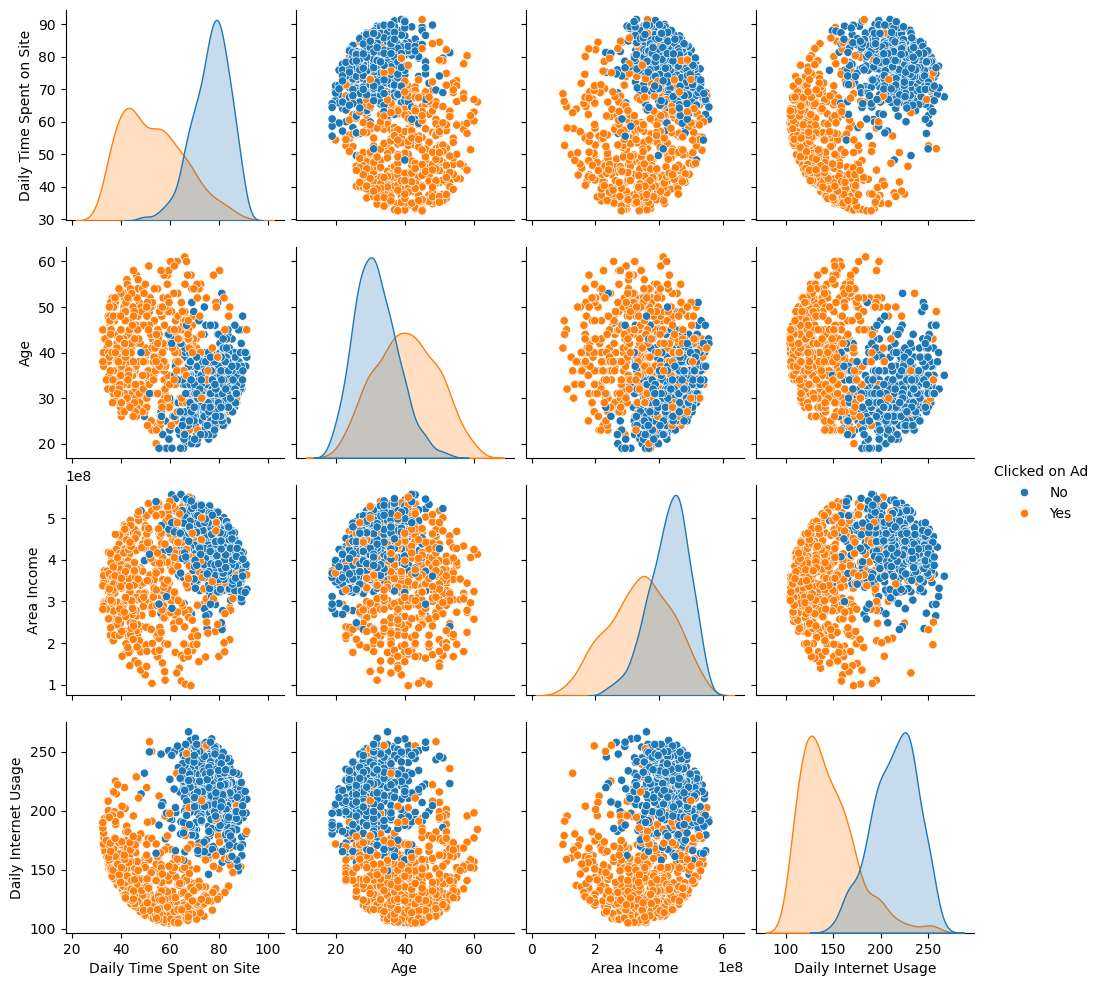

In [ ]:
sns.pairplot(df, hue='Clicked on Ad')
plt.show()

##correlation heatmap

<Axes: >

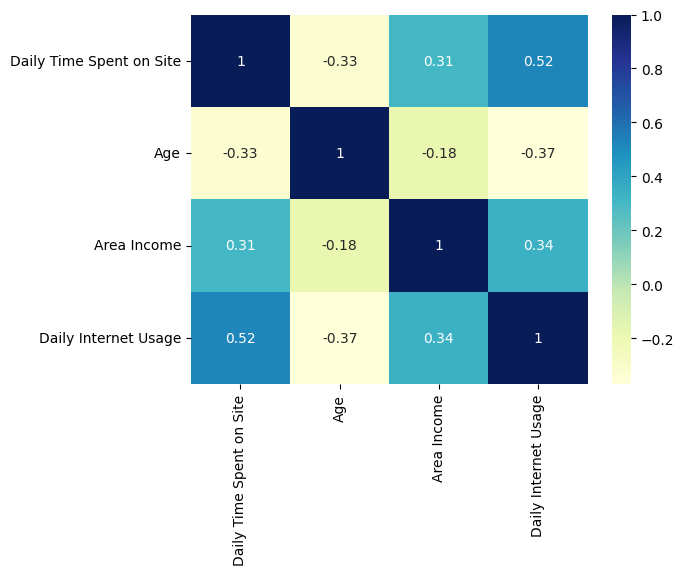

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="YlGnBu", annot=True)

#Tugas 2

##cleaning data: null & duplicated values

In [ ]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
# imputasi null value
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Male'] = df['Male'].fillna(df['Male'].mode()[0])
df.isna().sum().sum()

0

In [ ]:
df[df.duplicated()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category


##feature engineering: 'Timestamp'

In [ ]:
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['week'] = df['Timestamp'].dt.isocalendar().iloc[:, [1]]
df['day'] = df['Timestamp'].dt.day
df[['Timestamp', 'year', 'month', 'week', 'day']].sample(5)

,Timestamp,year,month,week,day
414,2016-04-06 21:20:00,2016,4,14,6
19,2016-02-27 04:43:00,2016,2,8,27
15,2016-03-09 03:41:00,2016,3,10,9
938,2016-02-12 03:39:00,2016,2,6,12
621,2016-06-14 19:48:00,2016,6,24,14


In [ ]:
df.year.value_counts()

year
2016    1000
Name: count, dtype: int64

In [ ]:
# memutuskan untuk menghapus column year karena hanya memiliki 1 unique value & juga menghapus column 'Timestamp' karena data sudah terwakilkan oleh tabel hasil feature engineering
df = df.drop(columns=['year', 'Timestamp'])

##feature encoding

In [ ]:
df.select_dtypes(include='object').columns

Index(['Male', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')

In [ ]:
df = pd.get_dummies(df,columns=['Male', 'city', 'province', 'category'], dtype='int')

In [ ]:
df.sample(2)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,month,week,day,Male_Laki-Laki,Male_Perempuan,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
563,62.26,37,545920970.0,166.19,No,5,21,26,0,1,...,0,0,0,0,0,0,0,0,0,1
914,41.86,39,371292390.0,128.62,Yes,3,12,26,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad', 'month', 'week', 'day',
       'Male_Laki-Laki', 'Male_Perempuan', 'city_Balikpapan',
       'city_Bandar Lampung', 'city_Bandung', 'city_Banjarmasin', 'city_Batam',
       'city_Bekasi', 'city_Bogor', 'city_Cimahi', 'city_Denpasar',
       'city_Depok', 'city_Jakarta Barat', 'city_Jakarta Pusat',
       'city_Jakarta Selatan', 'city_Jakarta Timur', 'city_Jakarta Utara',
       'city_Makassar', 'city_Malang', 'city_Medan', 'city_Padang',
       'city_Pakanbaru', 'city_Palembang', 'city_Pontianak', 'city_Samarinda',
       'city_Semarang', 'city_Serang', 'city_Surabaya', 'city_Surakarta',
       'city_Tangerang', 'city_Tangerang Selatan', 'city_Tasikmalaya',
       'province_Bali', 'province_Banten',
       'province_Daerah Khusus Ibukota Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Sel

##split data

In [ ]:
X = df.drop(columns='Clicked on Ad')
y = df['Clicked on Ad']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Tugas 3

##eksperimen 1 (sebelum normalisasi)

In [ ]:
# predicting
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)
Y_pred_tree = tree.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 1, n_jobs = 1)
forest.fit(X_train, y_train)
Y_pred_RF = forest.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
knn.fit(X_train, y_train)
Y_pred_KNN = knn.predict(X_test)

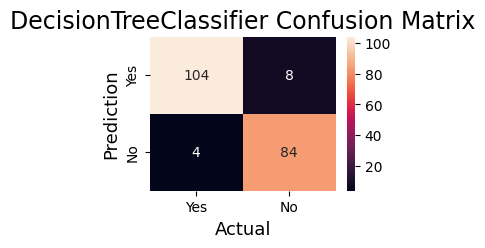

In [ ]:
# Confusion Matrix of DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, Y_pred_tree, labels=['Yes', 'No'])
plt.figure(figsize=(3,2))
sns.heatmap(cm_dt, annot=True, fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('DecisionTreeClassifier Confusion Matrix', fontsize=17)
plt.show()

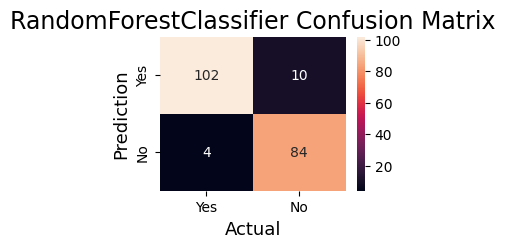

In [ ]:
# Confusion Matrix of RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, Y_pred_RF, labels=['Yes', 'No'])
plt.figure(figsize=(3,2))
sns.heatmap(cm_rf, annot=True, fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('RandomForestClassifier Confusion Matrix', fontsize=17)
plt.show()

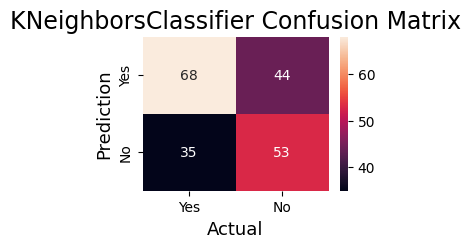

In [ ]:
# Confusion Matrix of KNeighborsClassifier
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, Y_pred_KNN, labels=['Yes', 'No'])
plt.figure(figsize=(3,2))
sns.heatmap(cm_knn, annot=True, fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('KNeighborsClassifier Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
# evaluation
from sklearn.metrics import confusion_matrix, classification_report

print('DecisionTreeClassifier')
print(classification_report(y_test, Y_pred_tree))

print('RandomForestClassifier')
print(classification_report(y_test, Y_pred_RF))

print('KNeighborsClassifier')
print(classification_report(y_test, Y_pred_KNN))

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.91      0.95      0.93        88
         Yes       0.96      0.93      0.95       112

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.89      0.95      0.92        88
         Yes       0.96      0.91      0.94       112

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

KNeighborsClassifier
              precision    recall  f1-score   support

          No       0.55      0.60      0.57        88
         Yes       0.66      0.61      0.63       112

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighte

##eksperimen 2 (setelah normalisasi)

In [ ]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler
X_train_nrm = MinMaxScaler().fit_transform(X_train)
X_test_nrm = MinMaxScaler().fit_transform(X_test)

In [ ]:
# predicting
treen = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
treen.fit(X_train_nrm, y_train)
Y_pred_tree_nrm = treen.predict(X_test_nrm)

forestn = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 1, n_jobs = 1)
forestn.fit(X_train_nrm, y_train)
Y_pred_RF_nrm = forestn.predict(X_test_nrm)

knnn = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
knnn.fit(X_train_nrm, y_train)
Y_pred_KNN_nrm = knnn.predict(X_test_nrm)

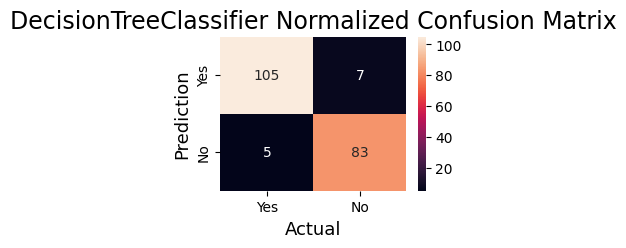

In [ ]:
# Confusion Matrix of DecisionTreeClassifier Normalized
from sklearn.metrics import confusion_matrix
cm_dtn = confusion_matrix(y_test, Y_pred_tree_nrm, labels=['Yes', 'No'])
plt.figure(figsize=(3,2))
sns.heatmap(cm_dtn, annot=True, fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('DecisionTreeClassifier Normalized Confusion Matrix', fontsize=17)
plt.show()

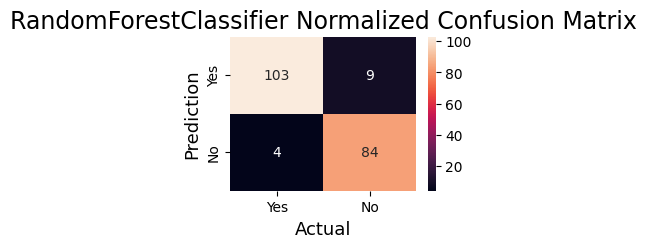

In [ ]:
# Confusion Matrix of RandomForestClassifier Normalized
cm_rfn = confusion_matrix(y_test, Y_pred_RF_nrm, labels=['Yes', 'No'])
plt.figure(figsize=(3,2))
sns.heatmap(cm_rfn, annot=True, fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('RandomForestClassifier Normalized Confusion Matrix', fontsize=17)
plt.show()

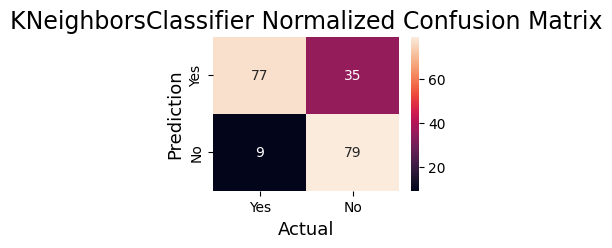

In [ ]:
# Confusion Matrix of KNeighborsClassifier Normalized
cm_knnn = confusion_matrix(y_test, Y_pred_KNN_nrm, labels=['Yes', 'No'])
plt.figure(figsize=(3,2))
sns.heatmap(cm_knnn, annot=True, fmt='g', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('KNeighborsClassifier Normalized Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
# evaluation
from sklearn.metrics import classification_report

print('DecisionTreeClassifier Normalized')
print(classification_report(y_test, Y_pred_tree_nrm))

print('RandomForestClassifier Normalized')
print(classification_report(y_test, Y_pred_RF_nrm))

print('KNeighborsClassifier Normalized')
print(classification_report(y_test, Y_pred_KNN_nrm))

DecisionTreeClassifier Normalized
              precision    recall  f1-score   support

          No       0.92      0.94      0.93        88
         Yes       0.95      0.94      0.95       112

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

RandomForestClassifier Normalized
              precision    recall  f1-score   support

          No       0.90      0.95      0.93        88
         Yes       0.96      0.92      0.94       112

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

KNeighborsClassifier Normalized
              precision    recall  f1-score   support

          No       0.69      0.90      0.78        88
         Yes       0.90      0.69      0.78       112

    accuracy                           0.78       200
   macro avg       0.79     

##feature importance

In [ ]:
print('feature importance DecisionTreeClassifier sebelum normalisasi')
print(pd.DataFrame({'features':X_train.columns,'feature_importance':tree.feature_importances_}).sort_values(by='feature_importance', ascending=False).head(10))
print('\n\nfeature importance RandomForestClassifier sebelum normalisasi')
print(pd.DataFrame({'features':X_train.columns,'feature_importance':forest.feature_importances_}).sort_values(by='feature_importance', ascending=False).head(10))

feature importance DecisionTreeClassifier sebelum normalisasi
                       features  feature_importance
3          Daily Internet Usage            0.675683
0      Daily Time Spent on Site            0.242153
1                           Age            0.048167
2                   Area Income            0.033997
42          province_Jawa Barat            0.000000
47    province_Kalimantan Timur            0.000000
46  province_Kalimantan Selatan            0.000000
45    province_Kalimantan Barat            0.000000
44          province_Jawa Timur            0.000000
43         province_Jawa Tengah            0.000000


feature importance RandomForestClassifier sebelum normalisasi
                    features  feature_importance
3       Daily Internet Usage            0.327272
0   Daily Time Spent on Site            0.242052
1                        Age            0.129713
2                Area Income            0.103295
6                        day            0.025201
5       

In [ ]:
print('feature importance DecisionTreeClassifier setelah normalisasi')
print(pd.DataFrame({'features':X_train.columns,'feature_importance':treen.feature_importances_}).sort_values(by='feature_importance', ascending=False).head(10))
print('\n\nfeature importance RandomForestClassifier setelah normalisasi')
print(pd.DataFrame({'features':X_train.columns,'feature_importance':forestn.feature_importances_}).sort_values(by='feature_importance', ascending=False).head(10))

feature importance DecisionTreeClassifier setelah normalisasi
                       features  feature_importance
3          Daily Internet Usage            0.675683
0      Daily Time Spent on Site            0.242153
1                           Age            0.048167
2                   Area Income            0.033997
42          province_Jawa Barat            0.000000
47    province_Kalimantan Timur            0.000000
46  province_Kalimantan Selatan            0.000000
45    province_Kalimantan Barat            0.000000
44          province_Jawa Timur            0.000000
43         province_Jawa Tengah            0.000000


feature importance RandomForestClassifier setelah normalisasi
                    features  feature_importance
3       Daily Internet Usage            0.327272
0   Daily Time Spent on Site            0.242052
1                        Age            0.129713
2                Area Income            0.103295
6                        day            0.025201
5       

In [ ]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

987